# Customer Attrition Analysis

### PART 1: Exploring data

#### Loading relevant libraries

In [1]:
import pandas as pd
import numpy as np

#### Importing data

In [2]:
data = pd.read_csv("D:\Python project\BankChurners.csv")
data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


#### Looking for empty values

In [61]:
data.isna().any() 


CLIENTNUM                                                                                                                             False
Attrition_Flag                                                                                                                        False
Customer_Age                                                                                                                          False
Gender                                                                                                                                False
Dependent_count                                                                                                                       False
Education_Level                                                                                                                       False
Marital_Status                                                                                                                        False
Income_Category     

There is no empty values in this dataset, so we can proceed cleaning it.

#### Dropping useless columns

In [4]:
df = data.drop(["Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1", "Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2"], 1)

#### Modifying dataset

In [5]:
#Convert Attrited/Existing customers data into 0/1.
df.loc[df["Attrition_Flag"] == "Existing Customer", "Attrition_Flag" ] = 0
df.loc[df["Attrition_Flag"] == "Attrited Customer", "Attrition_Flag" ] = 1
df.tail()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,0,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,0,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,0,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,0,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,0,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,0,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,710638233,1,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,716506083,1,44,F,1,High School,Married,Less than $40K,Blue,36,...,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,717406983,1,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


In [6]:
#df.to_csv("UpdatedAttrition_customers.csv", index = False)

In [7]:
# Transform all object columns into numeric columns for future uses.
from sklearn.preprocessing import LabelEncoder
for col in df.columns:
    if df[col].dtype == np.number:
        continue
    df[col] = LabelEncoder().fit_transform(df[col])

In [8]:
#df.to_csv("Updated_customers.csv", index = False)

Two new datasets are saved. UpdatedAttrition_customers.csv has Attrition column indicated by integer 0 or 1. This will make calculation and visualization easier in the following process. The second dataset Updated_customers.csv has converted all object columns into float columns. This will facilitate machine learning in Part 2.

### Part 2: What are the factors affecting customer turnover?

#### Read the first modified data

In [9]:
df1 = pd.read_csv("UpdatedAttrition_customers.csv")
df1.tail()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
10122,772366833,0,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,710638233,1,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,716506083,1,44,F,1,High School,Married,Less than $40K,Blue,36,...,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,717406983,1,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000
10126,714337233,1,43,F,2,Graduate,Married,Less than $40K,Silver,25,...,2,4,10388.0,1961,8427.0,0.703,10294,61,0.649,0.189


#### Dropping unnecessary columns

In [44]:
df2 = pd.read_csv("Updated_customers.csv")
df2["ID"] = df2["CLIENTNUM"]
df2 = df2.drop("CLIENTNUM", axis=1)

We are relocating the column with client ID to the end of list because we want to make Attrition_Flag to be the first column in the dataframe.

#### Splitting train and test data

In [45]:
Y = df2['Attrition_Flag']
X = df2.drop(['Attrition_Flag','ID'], axis = 1)

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

The train set is 75% percent of the data while 25% is the test set. We are dropping the column ID because it contains integers that are completely random, adding it would devastate the result of prediction.

#### Using Random Forest machine learning algorithm 

In [46]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
forest.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [47]:
forest.score(X_train, Y_train)

0.9972350230414746

The training set is 99% accurate.

In [62]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Y_test, forest.predict(X_test))
  
TN = cm[0][0]
TP = cm[1][1]
FN = cm[1][0]
FP = cm[0][1]
  
print(cm)
print('Model Testing Accuracy = "{}!"'.format(  (TP + TN) / (TP + TN + FN + FP)))

[[2131   17]
 [  96  288]]
Model Testing Accuracy = "0.9553712480252765!"


The testing accuracy is over 95%.

#### Importance of features that affect customer attrition

In [52]:
importances = pd.DataFrame({'feature':df2.drop(['Attrition_Flag','ID'], axis = 1).columns,'importance':np.round(forest.feature_importances_,3)}) 
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances

,importance
feature,
Total_Trans_Amt,0.214
Total_Trans_Ct,0.190
Total_Revolving_Bal,0.095
Avg_Utilization_Ratio,0.075
Total_Ct_Chng_Q4_Q1,0.075
Total_Amt_Chng_Q4_Q1,0.065
Total_Relationship_Count,0.063
Avg_Open_To_Buy,0.035
Credit_Limit,0.034


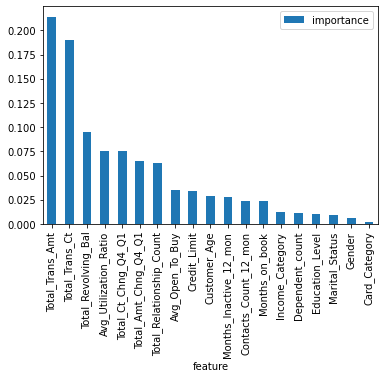

In [53]:
importances.plot.bar()

Total transaction amount affects the result the most, with an importance of 21.4%. As suggested by the plot below, the lower transaction amount in total, the higher average chance of customer turnover. Apart from that, the higher transaction count, the lower churn rate the bank would have. 

#### Plotting the top 2 important features against churn rate

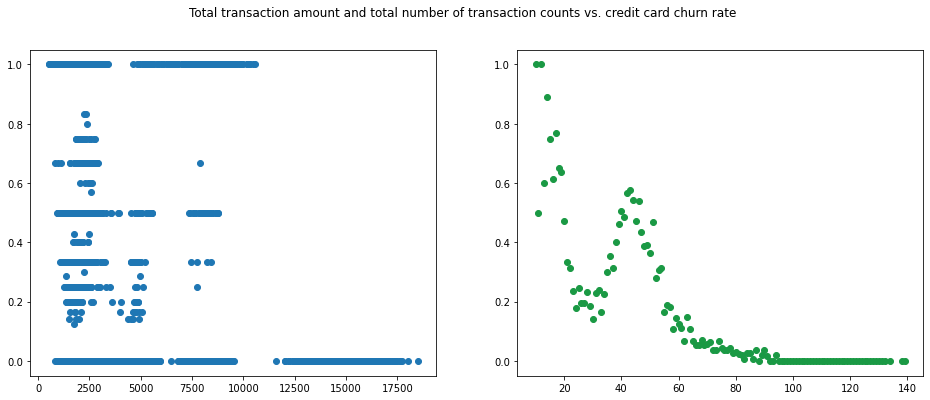

In [83]:
fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=(16,6))

fig.suptitle('Total transaction amount and total number of transaction counts vs. credit card churn rate')

by = df1.groupby("Total_Trans_Amt").mean().reset_index()
by2 = df1.groupby("Total_Trans_Ct").mean().reset_index()

ax1.scatter(by["Total_Trans_Amt"], by["Attrition_Flag"])
ax2.scatter(by2["Total_Trans_Ct"], by2["Attrition_Flag"], color = "#1a9944")


plt.show()

### Part 3: Can we predict potential existing customers that may attrite?

#### Adding a column predicting churn rate for each individual

In [59]:
df2['Probability_of_Churn'] = forest.predict_proba(df2[X_test.columns])[:,1]
df3 = df2.sort_values(by="Probability_of_Churn", ascending=False)

In [60]:
df3.to_csv("Attrition_prob.csv", index = False)

#### Filter customers that have high churn rate yet still are existing customers

In [86]:
df3 = pd.read_csv("Attrition_prob.csv")
df3.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,ID,Probability_of_Churn
0,1,24,0,3,3,1,4,0,20,2,...,2140.0,0,2140.0,0.765,1741,40,0.316,0.000,8790,1.0
1,1,28,0,2,2,1,5,0,31,1,...,3781.0,1228,2089.0,0.791,1265,33,0.720,0.448,6464,1.0
2,1,10,0,3,6,2,4,0,23,3,...,1558.0,27,1297.0,0.775,1363,30,0.600,0.168,6743,1.0
3,1,22,0,3,2,2,5,0,23,2,...,1630.0,781,387.0,0.400,890,33,0.303,0.763,6454,1.0
4,1,26,0,4,6,1,4,0,23,0,...,2143.0,0,2143.0,0.853,398,26,0.333,0.000,4300,1.0


In [100]:
potential_churn = df3.loc[(df3["Probability_of_Churn"]>=0.6) & (df3["Attrition_Flag"] == 0)]
potential_churn.shape

(21, 22)

In [106]:
potential_churn.reset_index().ID

0     5871
1     9880
2     9256
3     2079
4     8363
5     3722
6     4724
7     6391
8     4096
9     4583
10    8535
11    8015
12    1248
13    3865
14    6525
15     978
16    8896
17     785
18    8630
19    9092
20     872
Name: ID, dtype: int64

21 existing customers are in fact potential attrited customers at the threshold of 60% churn rate. It is recommended that the bank customer service team to contact these customers and perform relevant measures to keep them interested in the current service. 